## Data Set: OWID COVID Data
### Please check their repository
### https://github.com/owid/covid-19-data/tree/master/public/data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.tail()

In [2]:
# DtypeWarning: Columns (33) have mixed types. Check the column 33.
df.iloc[:,33].unique()

array([nan, 'tests performed', 'units unclear', 'samples tested',
       'people tested'], dtype=object)

#### There might have both numeric and non-numeric data in that column.
#### we can correct this by: df = pd.read_csv('owid-covid-data.csv', dtype={33: str})

In [3]:
df.shape

(376919, 67)

In [4]:
df_US = df[df['location']=='United States']
df_US.tail()

iso_code      continent       location       date  total_cases  \
356287      USA  North America  United States 2024-02-04  103436829.0   
356288      USA  North America  United States 2024-02-05          NaN   
356289      USA  North America  United States 2024-02-06          NaN   
356290      USA  North America  United States 2024-02-07          NaN   
356291      USA  North America  United States 2024-02-08          NaN   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
356287        NaN                 NaN     1170784.0         NaN   
356288        NaN                 NaN           NaN         NaN   
356289        NaN                 NaN           NaN         NaN   
356290        NaN                 NaN           NaN         NaN   
356291        NaN                 NaN           NaN         NaN   

        new_deaths_smoothed  ...  male_smokers  handwashing_facilities  \
356287                  NaN  ...          24.6                     NaN   
356288                  NaN  ...          24.6                     NaN   
356289                  NaN  ...          24.6                     NaN   
356290                  NaN  ...          24.6                     NaN   
356291                  NaN  ...          24.6                     NaN   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
356287                        2.77            78.86                    0.926   
356288                        2.77            78.86                    0.926   
356289                        2.77            78.86                    0.926   
356290                        2.77            78.86                    0.926   
356291                        2.77            78.86                    0.926   

         population  excess_mortality_cumulative_absolute  \
356287  338289856.0                                   NaN   
356288  338289856.0                                   NaN   
356289  338289856.0                                   NaN   
356290  338289856.0                                   NaN   
356291  338289856.0                                   NaN   

        excess_mortality_cumulative  excess_mortality  \
356287                          NaN               NaN   
356288                          NaN               NaN   
356289                          NaN               NaN   
356290                          NaN               NaN   
356291                          NaN               NaN   

        excess_mortality_cumulative_per_million  
356287                                      NaN  
356288                                      NaN  
356289                                      NaN  
356290                                      NaN  
356291                                      NaN  

[5 rows x 67 columns]

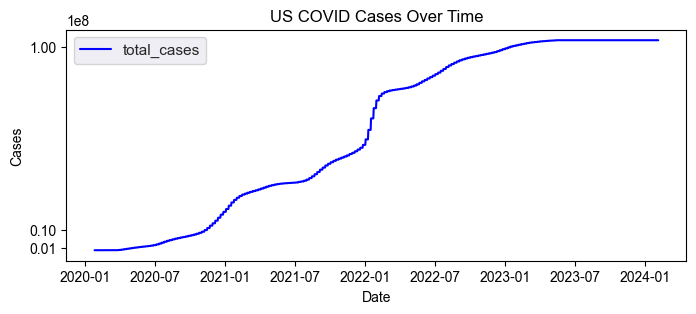

In [5]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.set_theme(style="darkgrid")

# Plot the data
sns.lineplot(data=df_US, x='date', y='total_cases', label='total_cases', color='blue')

# Set y-axis scale to linear
ax.set_yscale('linear')

# # Extract years for x-axis label
# years = df_US['date'].dt.year.unique()
# plt.xticks(ticks=df_US['date'], labels=years)

yticks = [10**6, 10**7, 10**8]
ax.set_yticks(yticks)

ax.set_xlabel('Date')
ax.set_ylabel('Cases')
ax.set_title('US COVID Cases Over Time')

plt.show()

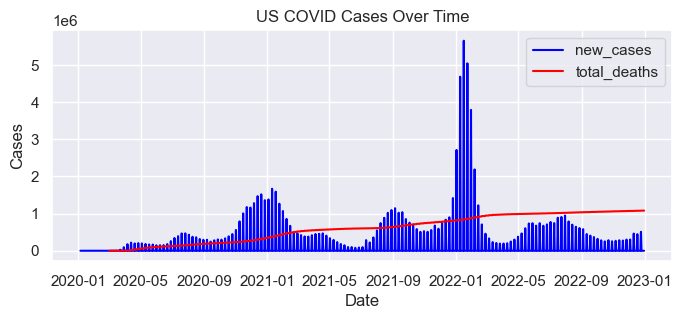

In [6]:
# Dataset stop updating new cases in the middle of 2023. Using data before 2023 only
df_US_2022 = df.loc[(df['location']=='United States')&(df['date'].dt.year <= 2022)]
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize=(8, 3))

# Plot the data
sns.lineplot(data=df_US_2022, x='date', y='new_cases', label='new_cases', color='blue')
sns.lineplot(data=df_US_2022, x='date', y='total_deaths', label='total_deaths', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Cases')
ax.set_title('US COVID Cases Over Time')

plt.show()

In [7]:
df['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

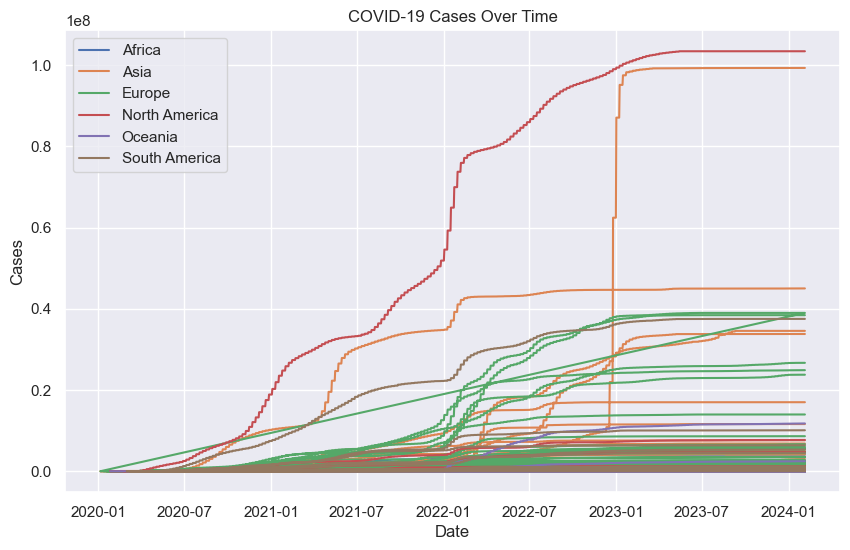

In [8]:
# Need to fix
list_continents = ['Asia', 'Europe', 'Africa', 'Oceania', 'North America', 'South America']
df_continent = df[df['continent'].isin(list_continents)]

grouped = df_continent.groupby('continent')

# Plot the lines for each country
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
for continent, data in grouped:
    plt.plot(data['date'], data['total_cases'],label = continent)

plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('COVID-19 Cases Over Time')
plt.legend()
plt.show()

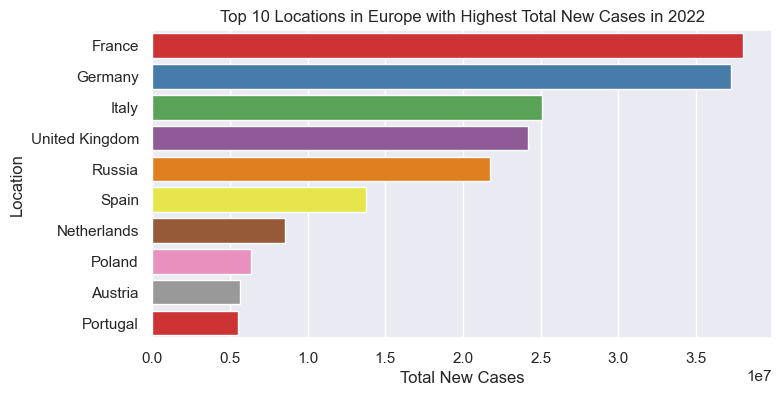

In [9]:
# Top 10 total new cases in specific period(2020-2022) in Europe
df_US_2022 = df.loc[(df['location']=='United States')&(df['date'].dt.year <= 2022)],[['date','new_cases']]
df_EU_2022 = df.loc[(df['continent'] == 'Europe') & (df['date'].dt.year <= 2022), ['date', 'location', 'new_cases']]

# Group location and sort
df_EU_2022_new_cases = df_EU_2022.groupby('location')['new_cases'].sum().reset_index()
df_EU_2022_top10 = df_EU_2022_new_cases.sort_values(by='new_cases', ascending=False).head(10)


fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style="darkgrid")
sns.barplot(y="location", x="new_cases", data=df_EU_2022_top10,
            label="new_cases", hue = 'location' ,palette ="Set1")
ax.set_xlabel('Total New Cases')
ax.set_ylabel('Location')
ax.set_title('Top 10 Locations in Europe with Highest Total New Cases in 2022')
plt.show()

In [10]:
# 7-Day moving average, dataframe prep
info = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']

df_India = df.loc[(df['location']=='India')&(df['date'].dt.year <= 2022), info]
df_Italy = df.loc[(df['location']=='Italy')&(df['date'].dt.year <= 2022), info]
df_Singapore = df.loc[(df['location']=='Singapore')&(df['date'].dt.year <= 2022), info]
df_UK = df.loc[(df['location']=='United Kingdom')&(df['date'].dt.year <= 2022), info]
df_US = df.loc[(df['location']=='United States')&(df['date'].dt.year <= 2022), info]

data_of_interests = [df_India,df_Italy, df_Singapore, df_UK, df_US]

df_of_interest = pd.concat(data_of_interests, axis=0).fillna(0).reindex()
df_of_interest

location       date  total_cases  new_cases  total_deaths  \
150703          India 2020-01-05          0.0        0.0           0.0   
150704          India 2020-01-06          0.0        0.0           0.0   
150705          India 2020-01-07          0.0        0.0           0.0   
150706          India 2020-01-08          0.0        0.0           0.0   
150707          India 2020-01-09          0.0        0.0           0.0   
...               ...        ...          ...        ...           ...   
355883  United States 2022-12-27   99019493.0        0.0     1079976.0   
355884  United States 2022-12-28   99019493.0        0.0     1079976.0   
355885  United States 2022-12-29   99019493.0        0.0     1079976.0   
355886  United States 2022-12-30   99019493.0        0.0     1079976.0   
355887  United States 2022-12-31   99019493.0        0.0     1079976.0   

        new_deaths  
150703         0.0  
150704         0.0  
150705         0.0  
150706         0.0  
150707         0.0  
...            ...  
355883         0.0  
355884         0.0  
355885         0.0  
355886         0.0  
355887         0.0  

[5460 rows x 6 columns]

In [11]:
# 7-Day moving average & plots
df_of_interest.iloc[:,3:] = df_of_interest.iloc[:,3:].apply(lambda x: round(x.rolling(7).mean(),2))
df_of_interest.tail()

location       date  total_cases  new_cases  total_deaths  \
355883  United States 2022-12-27   99019493.0   72572.71    1078242.86   
355884  United States 2022-12-28   99019493.0   72572.71    1078676.14   
355885  United States 2022-12-29   99019493.0   72572.71    1079109.43   
355886  United States 2022-12-30   99019493.0   72572.71    1079542.71   
355887  United States 2022-12-31   99019493.0   72572.71    1079976.00   

        new_deaths  
355883      433.29  
355884      433.29  
355885      433.29  
355886      433.29  
355887      433.29

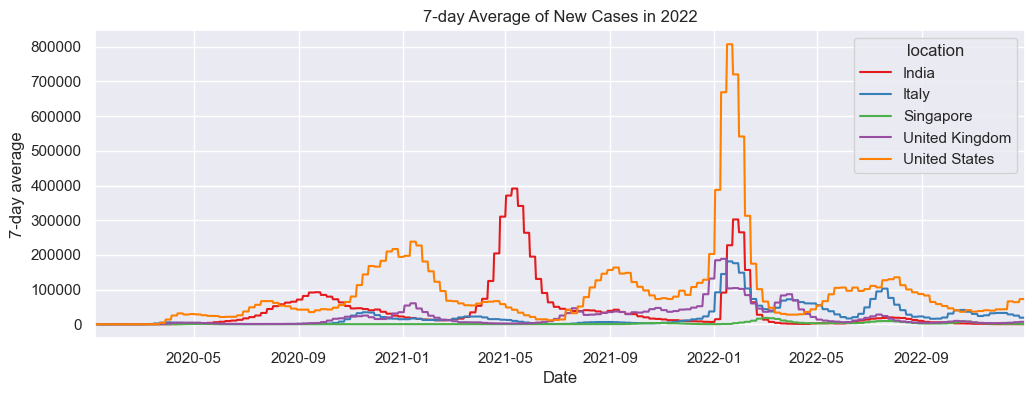

In [12]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.set_theme(style="darkgrid")
sns.lineplot(x="date", y="new_cases", data=df_of_interest, hue = 'location' ,palette ="Set1")
ax.set_xlim(df_of_interest.iloc[1,1], df_of_interest.iloc[-1,1])
ax.set_xlabel('Date')
ax.set_ylabel('7-day average')
ax.set_title('7-day Average of New Cases in 2022')
plt.show()

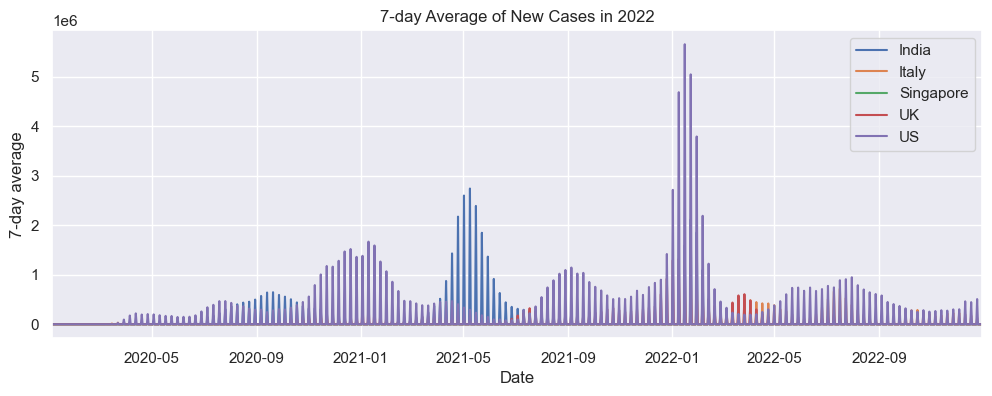

In [13]:
# 7-day average

fig, ax = plt.subplots(figsize=(12, 4))
data_of_interests = [df_India,df_Italy, df_Singapore, df_UK, df_US]
countries = ['India','Italy', 'Singapore', 'UK','US']

def func_plot(data, counter):
    ax.plot(data['date'], data['new_cases'],label = countries[counter])

for i in range(len(data_of_interests)):
    counter = i
    func_plot(data_of_interests[i], i)

min_date = df_of_interest['date'].min()
max_date = df_of_interest['date'].max()
ax.set_xlim(min_date, max_date)

ax.set_xlabel('Date')
ax.set_ylabel('7-day average')
ax.set_title('7-day Average of New Cases in 2022')
plt.legend()
plt.show()

In [14]:
# Plotly, choropleth, total cases in 2020
import plotly.express as px
df2020 = df.loc[df['date'].dt.year == 2020]
fig = px.choropleth(df2020,locations='location',locationmode='country names',color='total_cases', color_continuous_scale='Viridis', range_color=(0, df2020['total_cases'].max()/10), animation_frame='date')
fig.update_layout(title='Choropleth Map of COVID Cases in 2020',template="plotly_dark")
fig.show()

#### Among all continents, there are less cases in South America and Africa in the beginning of COVID; however, the cases in Brazil grew rapidly since mid of 2020.

In [15]:
# Continent Map (Europe)
fig = px.choropleth(df2020,locations='location',locationmode='country names',color='total_cases', color_continuous_scale='Viridis', range_color=(0, df2020['total_cases'].max()/20), animation_frame='date', scope='europe')
fig.update_layout(title='Choropleth Map of COVID Cases - Europe 2020',template="plotly_dark")

# adjust framerate
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 20
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 10

fig.show()

In [16]:
# Income data
df_income = df[df['location'].str.contains('income')]
df_income['location'].unique()

array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

In [17]:
grouped = df_income.groupby('location')
income_dict = dict()
for i in df_income['location'].unique():
    income_dict[i] = grouped.get_group(i)['total_cases'].max()
income_dict

{'High income': 428194364.0,
 'Low income': 2325993.0,
 'Lower middle income': 97510022.0,
 'Upper middle income': 245250937.0}

#### No special observation between total cases and the income level. Also, this dataset does not provide clear definition/value of the income level. Skipped. 

In [18]:
# US cases - County data

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df_county = pd.read_csv(url)
df_county['date'] = pd.to_datetime(df_county['date'], format='%Y-%m-%d')

state_url = "https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv"
df_state_abbv = pd.read_csv(state_url)

df_county.tail()

date      county    state     fips  cases  deaths
2502827 2022-05-13  Sweetwater  Wyoming  56037.0  11088   126.0
2502828 2022-05-13       Teton  Wyoming  56039.0  10074    16.0
2502829 2022-05-13       Uinta  Wyoming  56041.0   5643    39.0
2502830 2022-05-13    Washakie  Wyoming  56043.0   2358    44.0
2502831 2022-05-13      Weston  Wyoming  56045.0   1588    18.0

In [19]:
# Plot county data

last_date = df_county['date'].max()
df_county = df_county.loc[df_county['date'] == last_date]

df_states = df_county.groupby('state')['cases'].sum().to_frame()
df_states = pd.merge(df_states, df_state_abbv, left_on=df_states.index, right_on='State')

min_cases, max_cases = df_states['cases'].min(), df_states['cases'].max()

fig = px.choropleth(df_states, locations=df_states['Abbreviation'], color='cases',
                    locationmode="USA-states",
                    color_continuous_scale="Viridis",
                    range_color=(min_cases, max_cases),
                    scope="usa"
                    )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#### Among states, California has most COVID cases(9.35M), followed by Texas(6.79M), Florida(5.99M) and New York(5.26M).

### State population data from U.S. Census Bureau, Release Date: December 2023
#### https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html

In [20]:
# Loading population data
df_pop = pd.read_csv('NST-EST2023-POP.csv')
df_pop.head(10)

Geographic Area April 1, 2020 Estimates Base         2020         2021  \
0   United States                  331,464,948  331,526,933  332,048,977   
1       Northeast                   57,614,141   57,430,477   57,243,423   
2         Midwest                   68,987,296   68,969,794   68,850,246   
3           South                  126,268,529  126,465,281  127,353,282   
4            West                   78,594,982   78,661,381   78,602,026   
5         Alabama                    5,024,294    5,031,864    5,050,380   
6          Alaska                      733,374      732,964      734,923   
7         Arizona                    7,157,902    7,186,683    7,272,487   
8        Arkansas                    3,011,490    3,014,348    3,028,443   
9      California                   39,538,212   39,503,200   39,145,060   

          2022         2023  
0  333,271,411  334,914,895  
1   57,026,847   56,983,517  
2   68,783,028   68,909,283  
3  128,702,030  130,125,290  
4   78,759,506   78,896,805  
5    5,073,903    5,108,468  
6      733,276      733,406  
7    7,365,684    7,431,344  
8    3,046,404    3,067,732  
9   39,040,616   38,965,193

In [21]:
# Prepare dataframes
df_pop = df_pop.iloc[5:]
df_pop = df_pop.rename(columns = {'Geographic Area':'State'}).reset_index(drop=True)
df_pop_2022 = df_pop[['State','2022']].rename(columns = {'2022':'Population'})
df_states = pd.merge(df_states, df_pop_2022, on='State', how = 'left')
df_states.head()

cases       State Abbreviation  Population
0  1304710     Alabama           AL   5,073,903
1   254467      Alaska           AK     733,276
2  2030925     Arizona           AZ   7,365,684
3   838251    Arkansas           AR   3,046,404
4  9351630  California           CA  39,040,616

In [56]:
# Bubble Chart
df_pop_value = df_states['Population'].str.replace(',','')
df_pop_value = df_pop_value.astype(int)
df_states['Percent'] = 100 * df_states['cases']/df_pop_value

bins = [10, 15, 20, 25, 30, 35]
levels = [1,2,3,4,5]
df_states['Level'] = pd.cut(df_states['Percent'], bins=bins, labels=levels)

fig = px.scatter(df_states, x="Population", y="Percent",
	         size="cases", color="Level", hover_name="State", log_x=True, size_max=80)
fig.update_yaxes(title_text="Cases Per Capita")
fig.show()

#### In this scatter plot, we can observe that higher population does correlate with higher COVID cases; however, we can also noticed that there places with highest cases per capita is actually in the are with lower resident population. 
#### Among these three area, Rhode Island is expected since it's a popular spot for tourism. However, Alaska and North Dakota is not explainable by the visitors. Therefore, these two places will be the should be selected for further investigation.